In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('Diabetese.csv')
X = df.iloc[:, [0,1, 3]].values
Y = df.iloc[:, 4].values
plt.contourf

<function matplotlib.pyplot.contourf>

In [0]:
count=0;
for x in Y:
    if(x==1):
        count+=1

In [0]:
x=np.array(range(1,50))
n_class_0
n_class_1

31

Visualization of distribution of data before SMOTE

Text(0.5, 1.0, 'Distribution of Labels/Classes in the Dataset')

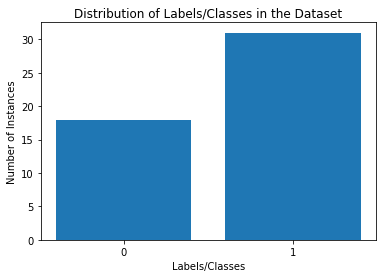

In [5]:
# Getting the no. of instances with Label 0
n_class_0 = df[df['Result']==0].shape[0]# Getting the no. of instances with label 1
n_class_1 = df[df['Result']==1].shape[0]# Bar Visualization of Class Distribution
import matplotlib.pyplot as plt # required library
x = ['0', '1']
y = np.array([n_class_0, n_class_1])
plt.bar(x,y)
plt.xlabel('Labels/Classes')
plt.ylabel('Number of Instances')
plt.title('Distribution of Labels/Classes in the Dataset')

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=1234)
# X_train and y_train is the Train-Validation Set
# X_test and y_test is the Test Set separated out

In [7]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 23
Before OverSampling, counts of label '0': 16 

After OverSampling, the shape of train_X: (46, 3)
After OverSampling, the shape of train_y: (46,) 

After OverSampling, counts of label '1': 23
After OverSampling, counts of label '0': 23


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.75      0.75         8

    accuracy                           0.60        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.60      0.60      0.60        10



In [0]:
import numpy as npdef nearest_neighbour(X, x):
    euclidean = np.ones(X.shape[0]-1)
    
    additive = [None]*(1*X.shape[1])
    additive = np.array(additive).reshape(1, X.shape[1])
    k = 0
    for j in range(0,X.shape[0]):
        if np.array_equal(X[j], x) == False:
            euclidean[k] = sqrt(sum((X[j]-x)**2))
            k = k + 1
    euclidean = np.sort(euclidean)
    weight = random.random()
    while(weight == 0):
        weight = random.random()
    additive = np.multiply(euclidean[:1],weight)
    return additive
    
def SMOTE_100(X):
    new = [None]*(X.shape[0]*X.shape[1])
    new = np.array(new).reshape(X.shape[0],X.shape[1])
    k = 0
    for i in range(0,X.shape[0]):
        additive = nearest_neighbour(X, X[i])
        for j in range(0,1):
            new[k] = X[i] + additive[j]
            k = k + 1
    return new # the synthetic samples created by SMOTe 


SyntaxError: ignored

In [0]:
# 1. Getting the number of Minority Class Instances in Training Set
unique, counts = np.unique(y_train, return_counts=True)
minority_shape = dict(zip(unique, counts))[0]# 2. Storing the minority class instances separately
x1 = np.ones((minority_shape, X_train.shape[0]))
k=0
for i in range(0,X_train.shape[1]):
    if y_train[i] == 0.0:
        x1[k] = X[i]
        k = k +  1  # 3. Applying 100% SMOTe
sampled_instances = SMOTE_100(x1)# Keeping the artificial instances and original instances together
X_f = np.concatenate((X_train,sampled_instances), axis = 0)
y_sampled_instances = np.ones(minority_shape)
y_f = np.concatenate((y_train,y_sampled_instances), axis=0)
# X_f and y_f are the Train-Validation Set Features and Labels respectively

NameError: ignored

31

In [1]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
